In [1]:
!pip install -q numpy
!pip install -q scipy
!pip install -q matplotlib
!pip install -q pandas
!pip install -q sympy

In [2]:
dictData = {
    "StreamNo":[1,2,3,4],
    "Type":['cold', 'hot', 'cold', 'hot'],
    "CP":[2.0,3.0,4.0,1.5],
    "Ts":[20,180,80,160],
    "Tt":[145,60,150,30],
}

dictData

{'StreamNo': [1, 2, 3, 4],
 'Type': ['cold', 'hot', 'cold', 'hot'],
 'CP': [2.0, 3.0, 4.0, 1.5],
 'Ts': [20, 180, 80, 160],
 'Tt': [145, 60, 150, 30]}

In [3]:
import pandas as pd

df = pd.DataFrame(dictData)
df

,StreamNo,Type,CP,Ts,Tt
0,1,cold,2.0,20,145
1,2,hot,3.0,180,60
2,3,cold,4.0,80,150
3,4,hot,1.5,160,30


In [4]:
df['dH'] = (df['CP'] * (df['Ts'] - df['Tt'])).abs()
df['Hs'] = (df['CP'] * df['Ts']).abs()
df['Ht'] = (df['CP'] * df['Tt']).abs()
df

,StreamNo,Type,CP,Ts,Tt,dH,Hs,Ht
0,1,cold,2.0,20,145,250.0,40.0,290.0
1,2,hot,3.0,180,60,360.0,540.0,180.0
2,3,cold,4.0,80,150,280.0,320.0,600.0
3,4,hot,1.5,160,30,195.0,240.0,45.0


In [5]:
dTmin = 5;
iT = dTmin/2;

(dTmin, iT)

(5, 2.5)

In [6]:
dfHot = df[df['Type']=='hot']
dfHot

,StreamNo,Type,CP,Ts,Tt,dH,Hs,Ht
1,2,hot,3.0,180,60,360.0,540.0,180.0
3,4,hot,1.5,160,30,195.0,240.0,45.0


In [7]:
yh = dfHot[['Ts','Tt']] - iT
yh

,Ts,Tt
1,177.5,57.5
3,157.5,27.5


In [8]:
dfCold = df[df['Type']=='cold']
dfCold

,StreamNo,Type,CP,Ts,Tt,dH,Hs,Ht
0,1,cold,2.0,20,145,250.0,40.0,290.0
2,3,cold,4.0,80,150,280.0,320.0,600.0


In [9]:
yc = dfCold[['Ts','Tt']] + iT
yc

,Ts,Tt
0,22.5,147.5
2,82.5,152.5


In [10]:
dfHC = pd.concat([yh, yc])
dfHC

,Ts,Tt
1,177.5,57.5
3,157.5,27.5
0,22.5,147.5
2,82.5,152.5


In [11]:
df[['iTs','iTt']] = dfHC
df

,StreamNo,Type,CP,Ts,Tt,dH,Hs,Ht,iTs,iTt
0,1,cold,2.0,20,145,250.0,40.0,290.0,22.5,147.5
1,2,hot,3.0,180,60,360.0,540.0,180.0,177.5,57.5
2,3,cold,4.0,80,150,280.0,320.0,600.0,82.5,152.5
3,4,hot,1.5,160,30,195.0,240.0,45.0,157.5,27.5


In [12]:
dfHot

,StreamNo,Type,CP,Ts,Tt,dH,Hs,Ht
1,2,hot,3.0,180,60,360.0,540.0,180.0
3,4,hot,1.5,160,30,195.0,240.0,45.0


In [13]:
dfs = df[['StreamNo','Type','CP','iTs']]
dfs.columns = ['StreamNo','Type','CP','iT']
dfs

,StreamNo,Type,CP,iT
0,1,cold,2.0,22.5
1,2,hot,3.0,177.5
2,3,cold,4.0,82.5
3,4,hot,1.5,157.5


In [14]:
dft = df[['StreamNo','Type','CP','iTt']]
dft.columns = ['StreamNo','Type','CP','iT']
dft

,StreamNo,Type,CP,iT
0,1,cold,2.0,147.5
1,2,hot,3.0,57.5
2,3,cold,4.0,152.5
3,4,hot,1.5,27.5


In [15]:
dfPT = pd.concat([dfs,dft], axis=0)
dfPT

,StreamNo,Type,CP,iT
0,1,cold,2.0,22.5
1,2,hot,3.0,177.5
2,3,cold,4.0,82.5
3,4,hot,1.5,157.5
0,1,cold,2.0,147.5
1,2,hot,3.0,57.5
2,3,cold,4.0,152.5
3,4,hot,1.5,27.5


In [16]:
dfPT = dfPT.sort_values(by="iT", ascending=False)
dfPT

,StreamNo,Type,CP,iT
1,2,hot,3.0,177.5
3,4,hot,1.5,157.5
2,3,cold,4.0,152.5
0,1,cold,2.0,147.5
2,3,cold,4.0,82.5
1,2,hot,3.0,57.5
3,4,hot,1.5,27.5
0,1,cold,2.0,22.5


In [17]:
dfPT = dfPT.drop_duplicates(subset='iT')

In [18]:
dfPT = dfPT.reset_index(drop=True)
dfPT['diT'] = -dfPT['iT'].diff()
dfPT['diT'].at[0] = 0
dfPT['iCP'] = 0

dfPT


,StreamNo,Type,CP,iT,diT,iCP
0,2,hot,3.0,177.5,0.0,0
1,4,hot,1.5,157.5,20.0,0
2,3,cold,4.0,152.5,5.0,0
3,1,cold,2.0,147.5,5.0,0
4,3,cold,4.0,82.5,65.0,0
5,2,hot,3.0,57.5,25.0,0
6,4,hot,1.5,27.5,30.0,0
7,1,cold,2.0,22.5,5.0,0


In [19]:
for i in list(dfPT.index)[:-1]:
    Tu=dfPT['iT'][i]
    Tl=dfPT['iT'][i+1]
    dfw = df[ 
    (df['Ts'] >= Tu+iT) & (df['Tt'] <= Tl+iT) 
    | (df['Ts'] <= Tl-iT) & (df['Tt'] >= Tu-iT) ]
    # print(dfw)
    dfCPc = dfw[dfw['Type']=='cold']
    CPc = dfCPc['CP'].sum()
    dfCPh = dfw[dfw['Type']=='hot']
    CPh = dfCPh['CP'].sum()
    iCP = CPc - CPh
    print(i, i+1, Tu, Tl, CPc, CPh, iCP)
    dfPT['iCP'].iat[i+1] = iCP


0 1 177.5 157.5 0.0 3.0 -3.0
1 2 157.5 152.5 0.0 4.5 -4.5
2 3 152.5 147.5 4.0 4.5 -0.5
3 4 147.5 82.5 6.0 4.5 1.5
4 5 82.5 57.5 2.0 4.5 -2.5
5 6 57.5 27.5 2.0 1.5 0.5
6 7 27.5 22.5 2.0 0.0 2.0


In [20]:
dfPT

,StreamNo,Type,CP,iT,diT,iCP
0,2,hot,3.0,177.5,0.0,0.0
1,4,hot,1.5,157.5,20.0,-3.0
2,3,cold,4.0,152.5,5.0,-4.5
3,1,cold,2.0,147.5,5.0,-0.5
4,3,cold,4.0,82.5,65.0,1.5
5,2,hot,3.0,57.5,25.0,-2.5
6,4,hot,1.5,27.5,30.0,0.5
7,1,cold,2.0,22.5,5.0,2.0


In [21]:
dfPT['diH'] = dfPT['diT'] * dfPT['iCP'] 

dfPT['Surplus'] = dfPT['diH'] < 0
dfPT

,StreamNo,Type,CP,iT,diT,iCP,diH,Surplus
0,2,hot,3.0,177.5,0.0,0.0,0.0,False
1,4,hot,1.5,157.5,20.0,-3.0,-60.0,True
2,3,cold,4.0,152.5,5.0,-4.5,-22.5,True
3,1,cold,2.0,147.5,5.0,-0.5,-2.5,True
4,3,cold,4.0,82.5,65.0,1.5,97.5,False
5,2,hot,3.0,57.5,25.0,-2.5,-62.5,True
6,4,hot,1.5,27.5,30.0,0.5,15.0,False
7,1,cold,2.0,22.5,5.0,2.0,10.0,False


In [22]:
dfPT['CH'] = (-dfPT['diH']).cumsum()
dfPT

,StreamNo,Type,CP,iT,diT,iCP,diH,Surplus,CH
0,2,hot,3.0,177.5,0.0,0.0,0.0,False,-0.0
1,4,hot,1.5,157.5,20.0,-3.0,-60.0,True,60.0
2,3,cold,4.0,152.5,5.0,-4.5,-22.5,True,82.5
3,1,cold,2.0,147.5,5.0,-0.5,-2.5,True,85.0
4,3,cold,4.0,82.5,65.0,1.5,97.5,False,-12.5
5,2,hot,3.0,57.5,25.0,-2.5,-62.5,True,50.0
6,4,hot,1.5,27.5,30.0,0.5,15.0,False,35.0
7,1,cold,2.0,22.5,5.0,2.0,10.0,False,25.0


In [23]:
dfPT['CH2'] = dfPT['diH']
dfPT['CH2'].iat[0] = dfPT['CH'].min()
dfPT['Pinch'] = -(dfPT['CH2']).cumsum()
dfPT

,StreamNo,Type,CP,iT,diT,iCP,diH,Surplus,CH,CH2,Pinch
0,2,hot,3.0,177.5,0.0,0.0,0.0,False,-0.0,-12.5,12.5
1,4,hot,1.5,157.5,20.0,-3.0,-60.0,True,60.0,-60.0,72.5
2,3,cold,4.0,152.5,5.0,-4.5,-22.5,True,82.5,-22.5,95.0
3,1,cold,2.0,147.5,5.0,-0.5,-2.5,True,85.0,-2.5,97.5
4,3,cold,4.0,82.5,65.0,1.5,97.5,False,-12.5,97.5,-0.0
5,2,hot,3.0,57.5,25.0,-2.5,-62.5,True,50.0,-62.5,62.5
6,4,hot,1.5,27.5,30.0,0.5,15.0,False,35.0,15.0,47.5
7,1,cold,2.0,22.5,5.0,2.0,10.0,False,25.0,10.0,37.5


In [26]:
from datetime import datetime

dt = datetime.now().strftime("%Y%m%d%H%M%S")
xlsxFilename = f"pinch_{dt}.xlsx"
svgfileName = f"pinch_{dt}.svg"
pngfileName = f"pinch_{dt}.png"


In [27]:
dfPTFinal = dfPT.drop(['StreamNo','Type','CP'],axis=1)

with pd.ExcelWriter(xlsxFilename) as writer:  
    df.to_excel(writer, sheet_name='Stream')
    dfPTFinal.to_excel(writer, sheet_name='PT')

dfPTFinal

,iT,diT,iCP,diH,Surplus,CH,CH2,Pinch
0,177.5,0.0,0.0,0.0,False,-0.0,-12.5,12.5
1,157.5,20.0,-3.0,-60.0,True,60.0,-60.0,72.5
2,152.5,5.0,-4.5,-22.5,True,82.5,-22.5,95.0
3,147.5,5.0,-0.5,-2.5,True,85.0,-2.5,97.5
4,82.5,65.0,1.5,97.5,False,-12.5,97.5,-0.0
5,57.5,25.0,-2.5,-62.5,True,50.0,-62.5,62.5
6,27.5,30.0,0.5,15.0,False,35.0,15.0,47.5
7,22.5,5.0,2.0,10.0,False,25.0,10.0,37.5


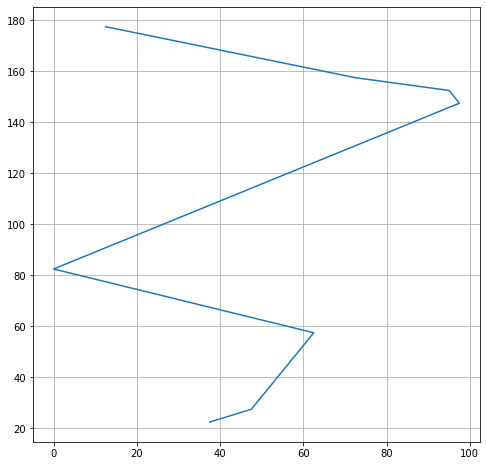

In [28]:
import matplotlib.pyplot as plt
from datetime import datetime

fig = plt.figure(figsize=(8,8))
x = dfPT['Pinch']
y = dfPT['iT']

plt.plot(x, y)
plt.grid()
plt.savefig(svgfileName)
plt.savefig(pngfileName)
